# Predicting the Sale Price of Bulldozers using Machine Learning <a id=99></a>

1. [Problem Definition](#1)
2. [Data](#2)
3. [Evaluation](#3)
4. [Features](#4)
    - 4.1 [Predicting Bulldozer Prices Data Dictionary](#5)
5. [Preparation](#6)
    - 5.1 [Preparing the tools](#7)
    - 5.2 [Load Data](#8)
    - 5.3 [Data Understanding](#9)
    - 5.4 [Parsing Dates](#10)
    - 5.5 [Sort DataFrame by Saledate](#11)
    - 5.6 [Convert string to Categories](#12)
    - 5.7 [Save Processed Data](#13)
    - 5.8 [Fill missing Values](#14)
6. [Exploratory Data Analysis](#15)
    - 6.1 [Check the number of unique values in each column](#16)
    - 6.2 [Separating the columns in Categorical and Continuous](#17)
    - 6.3 [Countplot of Categorical Features](#18)
    - 6.4 [YearMade Histogram Plot](#19)
    - 6.5 [SalePrice by YearMade](#20)
7. [Data Preprocessing](#21)
    - 7.1 [Conclusions from the EDA](#22)
    - 7.2 [Packages](#23)
    - 7.3 [Splitting data into train/valid sets](#24)
8. [Modeling](#25)
    - 8.1 [Building an Evaluation Function](#26)
    - 8.2 [Testing our Model on a Subset](#27)
9. [Hyperparameter tuning and cross-validation](#28)
    - 9.1 [Tuning model with with RandomizedSearchCV](#29)
    - 9.2 [Make predictions on test data](#30)
10. [Feature importance](#31)
    - 10.1 [Find Feature Importance of our best Model](#32)
    - 10.2 [Function for plotting Feature Importance](#33)
    - 10.3 [Visualise Feature Importance](#34)

### 1. Problem Definition <a id=1></a>
[Back to top](#99)

In this case, the problem we will be exploring is **reggresion**. 

This is because I am going to use a number of differnet **features** (pieces of information) about a bulldozers to predict their sale price.

In a statement,

> How well can we predict the future sale price of a bulldozer, given its characteristics previous examples of how much similar bulldozers have been sold for?

### 2. Data <a id=2></a>
[Back to top](#99)

I have downloaded the dataset from [Kaggle](https://www.kaggle.com/c/bluebook-for-bulldozers/data/). As we can see that it is a time series problem. That means there is a time attribute to dataset.

In this case, it's historical sales data of bulldozers. Including things like, model type, size, sale date and more.

There are 3 datasets:

1. **Train.csv** - Historical bulldozer sales examples up to 2011 (close to 400,000 examples with 50+ different attributes, including SalePrice which is the target variable).
2. **Valid.csv** - Historical bulldozer sales examples from 01.01.2012. to 30.04.2021. (close to 12,000 examples with the same attributes as Train.csv).
3. **Test.csv** - Historical bulldozer sales examples from 01.05.2021. to 01.11.2012. (close to 12,000 examples but missing the SalePrice attribute, as this is what we'll be trying to predict).

### 3. Evaluation <a id=3></a>
[Back to top](#99)

> For this problem, [Kaggle](https://www.kaggle.com/c/bluebook-for-bulldozers/overview/evaluation) has set the evaluation metric to being root mean squared log error (RMSLE). As with many regression evaluations, the goal will be to get this value as low as possible.

### 4. Features <a id=4></a>
[Back to top](#99)

#### 4.1 Predicting Bulldozer Prices Data Dictionary <a id=5></a>

The following are the features we'll use to predict our SalePrice attribute.

* **1. SalesID** - Unique identifier of a particular sale of a machine at auction
* **2. MachineID** - Identifier for a particular machine; machines may have multiple sales
* **3. ModelID** - Identifier for a unique machine model (i.e. fiModelDesc)
* **4. datasource** - Source of the sale record;  some sources are more diligent about reporting attributes of the machine than others.  Note that a particular datasource may report on multiple auctioneerIDs.
* **5. auctioneerID** - Identifier of a particular auctioneer, i.e. company that sold the machine at auction.  Not the same as datasource. 
* **6. YearMade** - Year of manufacturer of the Machine
* **7. MachineHoursCurrentMeter** - Current usage of the machine in hours at time of sale (saledate);  null or 0 means no hours have been reported for that sale
* **8. UsageBand** - Value (low, medium, high) calculated comparing this particular Machine-Sale hours to average usage for the fiBaseModel;  e.g. 'Low' means this machine has less hours given it's lifespan relative to average of fiBaseModel.
* **9. Saledate** - Time of sale
* **10. Saleprice** - Cost of sale in USD
* **11. fiModelDesc** - Description of a unique machine model (see ModelID); concatenation of fiBaseModel & fiSecondaryDesc & fiModelSeries & fiModelDescriptor
* **12. fiBaseModel** - Disaggregation of fiModelDesc
* **13. fiSecondaryDesc** - Disaggregation of fiModelDesc
* **14. fiModelSeries** - Disaggregation of fiModelDesc 
* **15. fiModelDescriptor** - Disaggregation of fiModelDesc 
* **16. ProductSize** - The size class grouping for a product group. Subsets within product group. 
* **17. ProductClassDesc** - Description of 2nd level hierarchical grouping (below ProductGroup) of fiModelDesc 
* **18. State** - US State in which sale occurred 
* **19. ProductGroup** - Identifier for top-level hierarchical grouping of fiModelDesc
* **20. ProductGroupDesc** - Description of top-level hierarchical grouping of fiModelDesc
* **21. Drive_System** - Typcially describes whether 2 or 4 wheel drive 
* **22. Enclosure** - Does machine have an enclosed cab or not
* **23. Forks** - Attachment used for lifting 
* **24. Pad_Type** - Type of treads a crawler machine uses 
* **25. Ride_Control** - Optional feature on loaders to make the ride smoother 
* **26. Stick** - Type of control  
* **27. Transmission** - Describes type of transmission;  typically automatic or manual 
* **28. Turbocharged** - Engine naturally aspirated or turbocharged
* **29. Blade_Extension** - Extension of standard blade 
* **30. Blade_Width** - Width of blade
* **31. Enclosure_Type** - Does machine have an enclosed cab or not 
* **32. Engine_Horsepower** - Engine horsepower rating
* **33. Hydraulics** - Type of hydraulics 
* **34. Pushblock** - Option 
* **35. Ripper** - Implement attached to machine to till soil 
* **36. Scarifier** -  Implement attached to machine to condition soil
* **37. Tip_control** - Type of blade control 
* **38. Tire_Size** - Size of primary tires 
* **39. Coupler** - Type of implement interface 
* **40. Coupler_System** - Type of implement interface 
* **41. Grouser_Tracks** - Describes ground contact interface
* **42. Hydraulics_Flow** - Normal or high flow hydraulic system 
* **43. Track_Type** - Type of treads a crawler machine uses 
* **44. Undercarriage_Pad_Width** - Width of crawler treads
* **45. Stick_Length** - Length of machine digging implement
* **46. Thumb** - Attachment used for grabbing
* **47. Pattern_Changer** - Can adjust the operator control configuration to suit the user
* **48. Grouser_Type** - Type of treads a crawler machine uses
* **49. Backhoe_Mounting** - Optional interface used to add a backhoe attachment
* **50. Blade_Type** - Describes type of blade
* **51. Travel_Controls** - Describes operator control configuration
* **52. Differential_Type** - Differential type, typically locking or standard
* **53. Steering_Controls** - Describes operator control configuration

### 5. Preparation <a id=6></a>
[Back to top](#99)

#### 5.1 Preparing the tools <a id=7></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor

import warnings
warnings.filterwarnings("ignore")

#### 5.2 Load Data <a id=8></a>

In [2]:
df = pd.read_csv("bulldozer/TrainAndValid.csv")

#### 5.3 Data Understanding <a id=9></a>

##### 5.3.1 Top 5 rows of our dataframe <a id=7></a>

In [3]:
df.head(5)

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000.0,999089,3157,121,3.0,2004,68.0,Low,11/16/2006 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000.0,117657,77,121,3.0,1996,4640.0,Low,3/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000.0,434808,7009,121,3.0,2001,2838.0,High,2/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500.0,1026470,332,121,3.0,2001,3486.0,High,5/19/2011 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000.0,1057373,17311,121,3.0,2007,722.0,Medium,7/23/2009 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


##### 5.3.2 The shape of the data

In [4]:
print("The shape of the dataset is : ", df.shape)

The shape of the dataset is :  (412698, 53)


##### 5.3.3 Check the number of unique values in each column

In [5]:
dict = {}
for i in list(df.columns):
    dict[i] = df[i].value_counts().shape[0]

pd.DataFrame(dict,index=["Unique Counter:"]).transpose()

,Unique Counter:
SalesID,412698
SalePrice,954
MachineID,348808
ModelID,5281
datasource,6
auctioneerID,30
YearMade,73
MachineHoursCurrentMeter,15633
UsageBand,3
saledate,4013


##### 5.3.4 Check our DataFrame summary info

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   saledate                  412698 non-null  object 
 10  fiModelDesc               412698 non-null  object 
 11  fiBaseModel               412698 non-null  object 
 12  fiSecondaryDesc           271971 non-null  object 
 13  fiModelSeries             58667 non-null   o

##### 5.3.5 Check our SalePrice column by saledates

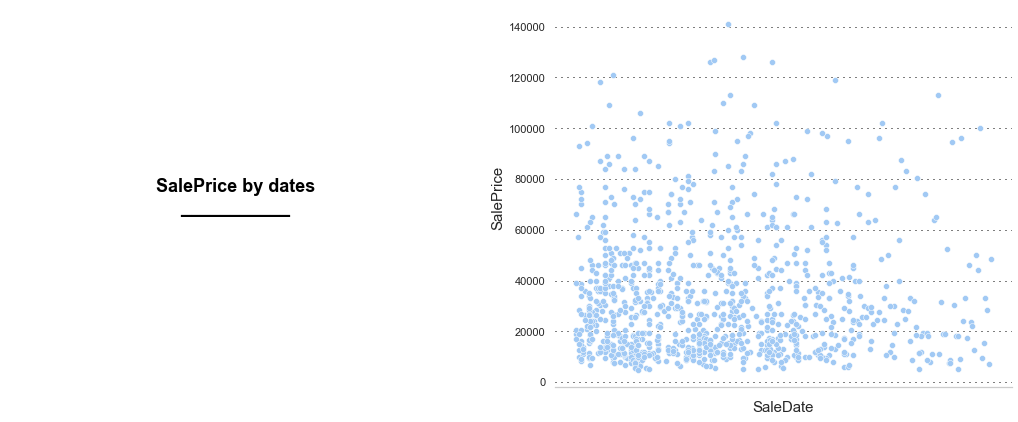

In [7]:
sns.set_theme(style="whitegrid", palette="pastel")

fig, (ax0, ax1) = plt.subplots(nrows=1,
                               ncols=2,
                               figsize=(18, 7))

ax0.text(0.5,0.5,"SalePrice by dates\n___________",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        fontweight='bold',
        color='#000000')

ax0.set_xticklabels([])
ax0.set_yticklabels([])
ax0.tick_params(left=False, bottom=False)
ax0.grid(False)

ax1.grid(False)
ax1.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.scatterplot(df["saledate"][:1000], df["SalePrice"][:1000]);
ax1.set_xlabel("SaleDate", fontsize=15)
ax1.set_ylabel("SalePrice", fontsize=15)
ax1.set_xticklabels([])

ax0.spines["top"].set_visible(False)
ax0.spines["left"].set_visible(False)
ax0.spines["bottom"].set_visible(False)
ax0.spines["right"].set_visible(False)
ax1.spines["top"].set_visible(False)
ax1.spines["left"].set_visible(False)
ax1.spines["right"].set_visible(False)

##### 5.3.6 Check SalePrice histogram

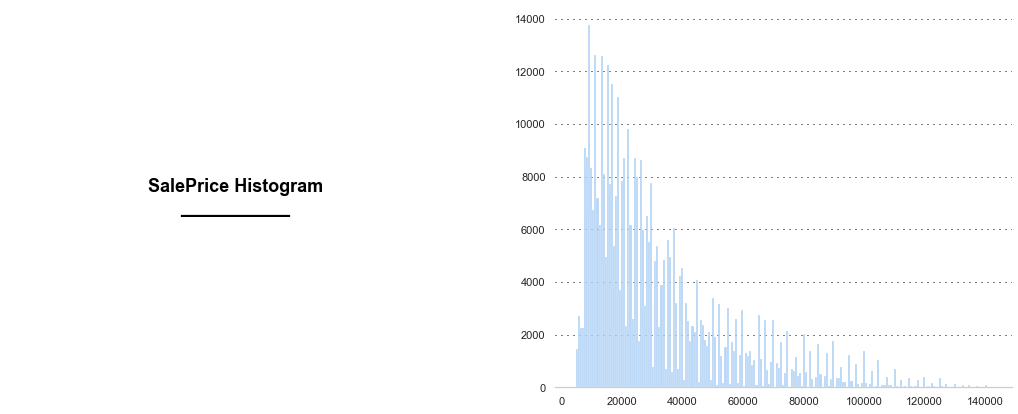

In [8]:
sns.set_theme(style="whitegrid", palette="pastel")

fig, (ax0, ax1) = plt.subplots(nrows=1,
                               ncols=2,
                               figsize=(18, 7))

ax0.text(0.5,0.5,"SalePrice Histogram\n___________",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        fontweight='bold',
        color='#000000')

ax0.set_xticklabels([])
ax0.set_yticklabels([])
ax0.tick_params(left=False, bottom=False)
ax0.grid(False)

ax1.grid(False)
ax1.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.histplot(df['SalePrice'])
ax1.set_xlabel("")
ax1.set_ylabel("")

ax0.spines["top"].set_visible(False)
ax0.spines["left"].set_visible(False)
ax0.spines["bottom"].set_visible(False)
ax0.spines["right"].set_visible(False)
ax1.spines["top"].set_visible(False)
ax1.spines["left"].set_visible(False)
ax1.spines["right"].set_visible(False)

#### 5.4 Parsing dates <a id=10></a>

When working with time series data, it's a good idea to make sure any date data is the format of a datetime object.



##### 5.4.1 Load Data parsing the saledate column

In [9]:
df = pd.read_csv("bulldozer/TrainAndValid.csv",
                 low_memory=False,
                 parse_dates=["saledate"])

##### 5.4.2 Check dtype of "saledate" column

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   SalesID                   412698 non-null  int64         
 1   SalePrice                 412698 non-null  float64       
 2   MachineID                 412698 non-null  int64         
 3   ModelID                   412698 non-null  int64         
 4   datasource                412698 non-null  int64         
 5   auctioneerID              392562 non-null  float64       
 6   YearMade                  412698 non-null  int64         
 7   MachineHoursCurrentMeter  147504 non-null  float64       
 8   UsageBand                 73670 non-null   object        
 9   saledate                  412698 non-null  datetime64[ns]
 10  fiModelDesc               412698 non-null  object        
 11  fiBaseModel               412698 non-null  object        
 12  fi

##### 5.4.3 Top 5 rows of our dataframe

In [11]:
df.head(5).T

,0,1,2,3,4
SalesID,1139246,1139248,1139249,1139251,1139253
SalePrice,66000,57000,10000,38500,11000
MachineID,999089,117657,434808,1026470,1057373
ModelID,3157,77,7009,332,17311
datasource,121,121,121,121,121
auctioneerID,3,3,3,3,3
YearMade,2004,1996,2001,2001,2007
MachineHoursCurrentMeter,68,4640,2838,3486,722
UsageBand,Low,Low,High,High,Medium
saledate,2006-11-16 00:00:00,2004-03-26 00:00:00,2004-02-26 00:00:00,2011-05-19 00:00:00,2009-07-23 00:00:00


##### 5.4.4 Top 20 rows of our saledate column

In [12]:
df.saledate.head(20)

0    2006-11-16
1    2004-03-26
2    2004-02-26
3    2011-05-19
4    2009-07-23
5    2008-12-18
6    2004-08-26
7    2005-11-17
8    2009-08-27
9    2007-08-09
10   2008-08-21
11   2006-08-24
12   2005-10-20
13   2006-01-26
14   2006-01-03
15   2006-11-16
16   2007-06-14
17   2010-01-28
18   2006-03-09
19   2005-11-17
Name: saledate, dtype: datetime64[ns]

#### 5.5 Sort DataFrame by Saledate <a id=11></a>
As we're working on a time series problem and trying to predict future examples given past examples, it makes sense to sort our data by date.

##### 5.5.1 Sort our DataFrame in date order

In [13]:
df.sort_values(by=["saledate"], inplace=True, ascending=True)
df.saledate.head(20)

205615   1989-01-17
274835   1989-01-31
141296   1989-01-31
212552   1989-01-31
62755    1989-01-31
54653    1989-01-31
81383    1989-01-31
204924   1989-01-31
135376   1989-01-31
113390   1989-01-31
113394   1989-01-31
116419   1989-01-31
32138    1989-01-31
127610   1989-01-31
76171    1989-01-31
127000   1989-01-31
128130   1989-01-31
127626   1989-01-31
55455    1989-01-31
55454    1989-01-31
Name: saledate, dtype: datetime64[ns]

##### 5.5.2 Make a copy of the original DataFrame
Since we're going to be manipulating the data, I will make a copy of the original DataFrame and perform changes there.

This will keep the original DataFrame in tact if I need them again.

In [14]:
df_copy = df.copy()

##### 5.5.3 Add datetime parameter for saledate column

Because I imported the data using `read_csv()` and parsed the dates using `parase_dates=["saledate"]`, I can now access the different datetime attributes of the `saledate` column.

In [15]:
df_copy["saleYear"] = df_copy.saledate.dt.year
df_copy["saleMonth"] = df_copy.saledate.dt.month
df_copy["saleDay"] = df_copy.saledate.dt.day
df_copy["saleDayofweek"] = df_copy.saledate.dt.dayofweek
df_copy["saleDayofyear"] = df_copy.saledate.dt.dayofyear

df_copy.drop("saledate", axis=1, inplace=True)

In [16]:
df_copy.head().T

,205615,274835,141296,212552,62755
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500,14000,50000,16000,22000
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
auctioneerID,18,99,99,99,99
YearMade,1974,1980,1978,1980,1984
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
fiModelDesc,TD20,A66,D7G,A62,D3B


#### 5.6 Convert strings to Categories <a id=12></a>

##### 5.6.1 Check which columns contain strings

In [17]:
for label, content in df_copy.items():
    if pd.api.types.is_string_dtype(content):
        print(label)

UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


##### 5.6.2 Turn all of the string values into category values

In [18]:
for label, content in df_copy.items():
    if pd.api.types.is_string_dtype(content):
        df_copy[label] = content.astype("category").cat.as_ordered()

In [19]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 412698 entries, 205615 to 409203
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   SalesID                   412698 non-null  int64   
 1   SalePrice                 412698 non-null  float64 
 2   MachineID                 412698 non-null  int64   
 3   ModelID                   412698 non-null  int64   
 4   datasource                412698 non-null  int64   
 5   auctioneerID              392562 non-null  float64 
 6   YearMade                  412698 non-null  int64   
 7   MachineHoursCurrentMeter  147504 non-null  float64 
 8   UsageBand                 73670 non-null   category
 9   fiModelDesc               412698 non-null  category
 10  fiBaseModel               412698 non-null  category
 11  fiSecondaryDesc           271971 non-null  category
 12  fiModelSeries             58667 non-null   category
 13  fiModelDescriptor       

All of our data is categorical and I can now turn the categories into numbers, however it's still missing values. Before I start filling missing values I will save processed data.

#### 5.7 Save Processed Data <a id=13></a>

In [20]:
df_copy.to_csv("bulldozer/train_tmp.csv",
              index=False)

In [21]:
df_copy.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension             386715
Blade_Width         

#### 5.8 Fill missing values <a id=14></a>

##### 5.8.1 Filling numerical values first
We're going to fill any column with missing values with the median of that column.

###### 5.8.1.1 Check which columns are numeric

In [22]:
for label, content in df_copy.items():
    if pd.api.types.is_numeric_dtype(content):
        print(label)

SalesID
SalePrice
MachineID
ModelID
datasource
auctioneerID
YearMade
MachineHoursCurrentMeter
saleYear
saleMonth
saleDay
saleDayofweek
saleDayofyear


###### 5.8.1.2 Check for which numeric columns have null values

In [23]:
for label, content in df_copy.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

auctioneerID
MachineHoursCurrentMeter


###### 5.8.1.3 Fill numeric values with median

In [24]:
for label, content in df_copy.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            # Add a binary column which tells if the data was missing our not
            df_copy[label+"_is_missing"] = pd.isnull(content)
            # Fill missing numeric values with median since it's more robust than the mean
            df_copy[label] = content.fillna(content.median())

###### 5.8.1.4 Lets check again if there's any null values

In [25]:
for label, content in df_copy.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

##### 5.8.2 Filling and turning categorical variables to numbers

###### 5.8.2.1 Check columns which are not numeric

In [26]:
for label, content in df_copy.items():
    if not pd.api.types.is_numeric_dtype(content):
        print(label)

UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


###### 5.8.2.2 Turn all categorical columns to numeric

In [27]:
for label, content in df_copy.items():
    # Check columns which aren't numeric
    if not pd.api.types.is_numeric_dtype(content):
        # Add binary column to inidicate whether sample had missing value
        df_copy[label+"_is_missing"] = pd.isnull(content)
        # We add the +1 because pandas encodes missing categories as -1
        df_copy[label] = pd.Categorical(content).codes+1

###### 5.8.2.3 Check our DataFrame data types

In [28]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 412698 entries, 205615 to 409203
Columns: 103 entries, SalesID to Steering_Controls_is_missing
dtypes: bool(46), float64(3), int16(4), int64(10), int8(40)
memory usage: 81.1 MB


###### 5.8.2.4 Missing values

In [29]:
df_copy.isna().sum()

SalesID                         0
SalePrice                       0
MachineID                       0
ModelID                         0
datasource                      0
                               ..
Backhoe_Mounting_is_missing     0
Blade_Type_is_missing           0
Travel_Controls_is_missing      0
Differential_Type_is_missing    0
Steering_Controls_is_missing    0
Length: 103, dtype: int64

In [30]:
df_copy.head().T

,205615,274835,141296,212552,62755
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500,14000,50000,16000,22000
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
...,...,...,...,...,...
Backhoe_Mounting_is_missing,False,True,False,True,False
Blade_Type_is_missing,False,True,False,True,False
Travel_Controls_is_missing,False,True,False,True,False
Differential_Type_is_missing,True,False,True,False,True


**CONCLUSION**: Now all of our data is numeric and there are no missing values, can do further analysis and build a machine learning models.

### 6. Exploratory Data Analysis <a id=15></a>
[Back to top](#99)

#### 6.1 Check the number of unique values in each column <a id=16></a>

In [31]:
dict = {}
for i in list(df.columns):
    dict[i] = df[i].value_counts().shape[0]

pd.DataFrame(dict,index=["Unique Counter:"]).transpose()

,Unique Counter:
SalesID,412698
SalePrice,954
MachineID,348808
ModelID,5281
datasource,6
auctioneerID,30
YearMade,73
MachineHoursCurrentMeter,15633
UsageBand,3
saledate,4013


#### 6.2 Separating the columns in Categorical and Continuous <a id=17></a>

In [32]:
cat_cols = ['datasource','UsageBand','ProductSize','ProductGroup','ProductGroupDesc','Drive_System','Enclosure','Forks','Pad_Type','Ride_Control','Stick','Transmission','Turbocharged','Blade_Extension','Blade_Width','Enclosure_Type','Engine_Horsepower','Pushblock','Ripper','Scarifier','Tip_Control','Coupler','Coupler_System','Grouser_Tracks','Hydraulics_Flow','Track_Type','Thumb','Pattern_Changer','Grouser_Type','Backhoe_Mounting','Travel_Controls','Differential_Type','Steering_Controls']

con_cols = ['SalesID','MachineID','ModelID','auctioneerID','YearMade','MachineHoursCurrentMeter','saledate','fiModelDesc', 'fiBaseModel', 'fiSecondaryDesc','fiModelSeries','fiModelDescriptor','fiProductClassDesc','state','Hydraulics','Tire_Size','Undercarriage_Pad_Width','Stick_Length','Blade_Type']

target_col = ["SalePrice"]

print("\nThe categorial columns are : ", cat_cols)
print("\nThe continuous columns are : ", con_cols)
print("\nThe target variable is :  ", target_col);


The categorial columns are :  ['datasource', 'UsageBand', 'ProductSize', 'ProductGroup', 'ProductGroupDesc', 'Drive_System', 'Enclosure', 'Forks', 'Pad_Type', 'Ride_Control', 'Stick', 'Transmission', 'Turbocharged', 'Blade_Extension', 'Blade_Width', 'Enclosure_Type', 'Engine_Horsepower', 'Pushblock', 'Ripper', 'Scarifier', 'Tip_Control', 'Coupler', 'Coupler_System', 'Grouser_Tracks', 'Hydraulics_Flow', 'Track_Type', 'Thumb', 'Pattern_Changer', 'Grouser_Type', 'Backhoe_Mounting', 'Travel_Controls', 'Differential_Type', 'Steering_Controls']

The continuous columns are :  ['SalesID', 'MachineID', 'ModelID', 'auctioneerID', 'YearMade', 'MachineHoursCurrentMeter', 'saledate', 'fiModelDesc', 'fiBaseModel', 'fiSecondaryDesc', 'fiModelSeries', 'fiModelDescriptor', 'fiProductClassDesc', 'state', 'Hydraulics', 'Tire_Size', 'Undercarriage_Pad_Width', 'Stick_Length', 'Blade_Type']

The target variable is :   ['SalePrice']


#### 6.3 Count plot of Categorical Features <a id=18></a>

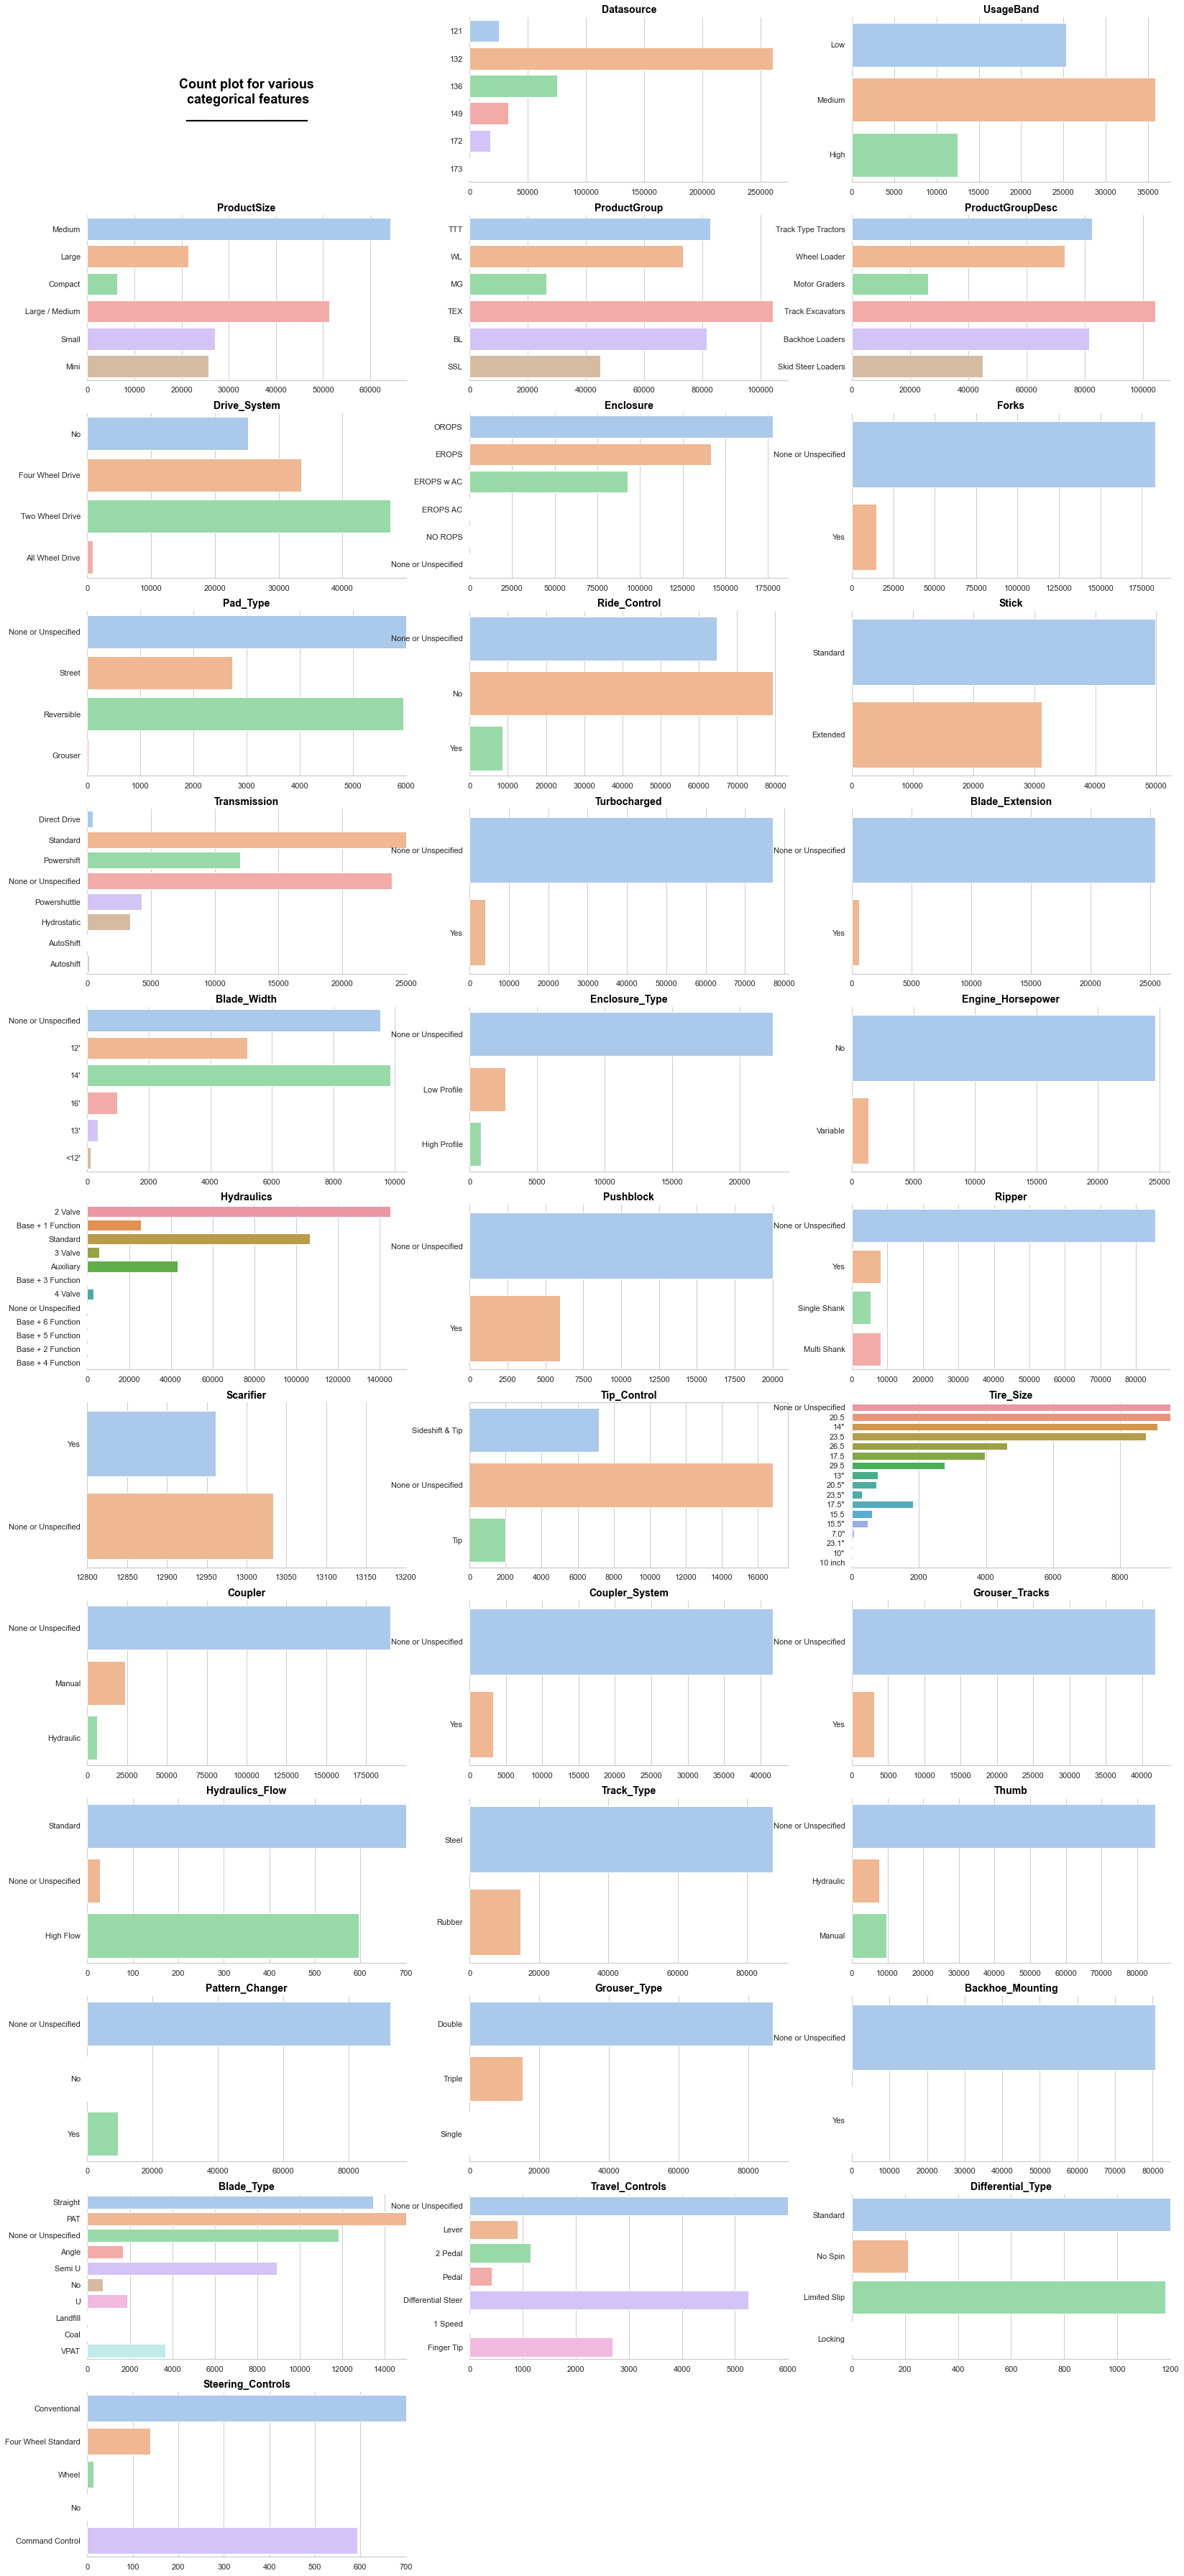

In [33]:
sns.set_theme(style="whitegrid", palette="pastel")

fig, ((ax0, ax1, ax2), (ax3, ax4, ax5), (ax6, ax7, ax8),
      (ax9, ax10, ax11), (ax12, ax13, ax14), (ax15, ax16, ax17),
      (ax18, ax19, ax20), (ax21, ax22, ax23), (ax24, ax25, ax26),
      (ax27, ax28, ax29), (ax30, ax31, ax32),
      (ax33, ax34, ax35), (ax36, ax37, ax38)) = plt.subplots(nrows=13,
                                                             ncols=3,
                                                             figsize=(27, 65))

ax0.spines["bottom"].set_visible(False)
ax0.spines["left"].set_visible(False)
ax0.spines["top"].set_visible(False)
ax0.spines["right"].set_visible(False)
ax0.tick_params(left=False, bottom=False)
ax0.set_xticklabels([])
ax0.set_yticklabels([])
ax0.grid(False)
ax0.text(0.5,0.5,
         'Count plot for various\n categorical features\n_________________',
         horizontalalignment='center',
         verticalalignment='center',
         fontsize=18, fontweight='bold',
         color="#000000")

# Datasource count
ax1.set_title('Datasource', fontdict={'fontsize': 14, 'fontweight': 'bold', 'color': '000000'})
ax1.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax1,data=df,y='datasource')
ax1.set_xlabel("")
ax1.set_ylabel("")

# UsageBand count
ax2.set_title('UsageBand', fontdict={'fontsize': 14, 'fontweight': 'bold', 'color': '000000'})
ax2.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax2,data=df,y='UsageBand')
ax2.set_xlabel("")
ax2.set_ylabel("")

# ProductSize count
ax3.set_title('ProductSize', fontdict={'fontsize': 14, 'fontweight': 'bold', 'color': '000000'})
ax3.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax3,data=df,y='ProductSize')
ax3.set_xlabel("")
ax3.set_ylabel("")

# ProductGroup count
ax4.set_title('ProductGroup', fontdict={'fontsize': 14, 'fontweight': 'bold', 'color': '000000'})
ax4.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax4,data=df,y='ProductGroup')
ax4.set_xlabel("")
ax4.set_ylabel("")

# ProductGroupDesc count
ax5.set_title('ProductGroupDesc', fontdict={'fontsize': 14, 'fontweight': 'bold', 'color': '000000'})
ax5.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax5,data=df,y='ProductGroupDesc')
ax5.set_xlabel("")
ax5.set_ylabel("")

# Drive_System count
ax6.set_title('Drive_System', fontdict={'fontsize': 14, 'fontweight': 'bold', 'color': '000000'})
ax6.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax6,data=df,y='Drive_System')
ax6.set_xlabel("")
ax6.set_ylabel("")

# Enclosure count
ax7.set_title('Enclosure', fontdict={'fontsize': 14, 'fontweight': 'bold', 'color': '000000'})
ax7.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax7,data=df,y='Enclosure')
ax7.set_xlabel("")
ax7.set_ylabel("")

# Forks count
ax8.set_title('Forks', fontdict={'fontsize': 14, 'fontweight': 'bold', 'color': '000000'})
ax8.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax8,data=df,y='Forks')
ax8.set_xlabel("")
ax8.set_ylabel("")

# Pad_Type count
ax9.set(xlim=(0, 6000))
ax9.set_title('Pad_Type', fontdict={'fontsize': 14, 'fontweight': 'bold', 'color': '000000'})
ax9.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax9,data=df,y='Pad_Type')
ax9.set_xlabel("")
ax9.set_ylabel("")

# Ride_Control count
ax10.set_title('Ride_Control', fontdict={'fontsize': 14, 'fontweight': 'bold', 'color': '000000'})
ax10.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax10,data=df,y='Ride_Control')
ax10.set_xlabel("")
ax10.set_ylabel("")

# Stick count
ax11.set_title('Stick', fontdict={'fontsize': 14, 'fontweight': 'bold', 'color': '000000'})
ax11.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax11,data=df,y='Stick')
ax11.set_xlabel("")
ax11.set_ylabel("")

# Transmission count
ax12.set(xlim=(0, 25000))
ax12.set_title('Transmission', fontdict={'fontsize': 14, 'fontweight': 'bold', 'color': '000000'})
ax12.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax12,data=df,y='Transmission')
ax12.set_xlabel("")
ax12.set_ylabel("")

# Turbocharged count
ax13.set_title('Turbocharged', fontdict={'fontsize': 14, 'fontweight': 'bold', 'color': '000000'})
ax13.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax13,data=df,y='Turbocharged')
ax13.set_xlabel("")
ax13.set_ylabel("")

# Blade_Extension count
ax14.set_title('Blade_Extension', fontdict={'fontsize': 14, 'fontweight': 'bold', 'color': '000000'})
ax14.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax14,data=df,y='Blade_Extension')
ax14.set_xlabel("")
ax14.set_ylabel("")

# Blade_Width count
ax15.set_title('Blade_Width', fontdict={'fontsize': 14, 'fontweight': 'bold', 'color': '000000'})
ax15.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax15,data=df,y='Blade_Width')
ax15.set_xlabel("")
ax15.set_ylabel("")

# Enclosure_Type count
ax16.set_title('Enclosure_Type', fontdict={'fontsize': 14, 'fontweight': 'bold', 'color': '000000'})
ax16.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax16,data=df,y='Enclosure_Type')
ax16.set_xlabel("")
ax16.set_ylabel("")

# Engine_Horsepower count
ax17.set_title('Engine_Horsepower', fontdict={'fontsize': 14, 'fontweight': 'bold', 'color': '000000'})
ax17.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax17,data=df,y='Engine_Horsepower')
ax17.set_xlabel("")
ax17.set_ylabel("")

# Hydraulics count
ax18.set_title('Hydraulics', fontdict={'fontsize': 14, 'fontweight': 'bold', 'color': '000000'})
ax18.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax18,data=df,y='Hydraulics')
ax18.set_xlabel("")
ax18.set_ylabel("")

# Pushblock count
ax19.set_title('Pushblock', fontdict={'fontsize': 14, 'fontweight': 'bold', 'color': '000000'})
ax19.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax19,data=df,y='Pushblock')
ax19.set_xlabel("")
ax19.set_ylabel("")

# Ripper count
ax20.set_title('Ripper', fontdict={'fontsize': 14, 'fontweight': 'bold', 'color': '000000'})
ax20.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax20,data=df,y='Ripper')
ax20.set_xlabel("")
ax20.set_ylabel("")

# Scarifier count
ax21.set(xlim=(12800, 13200))
ax21.set_title('Scarifier', fontdict={'fontsize': 14, 'fontweight': 'bold', 'color': '000000'})
ax21.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax21,data=df,y='Scarifier')
ax21.set_xlabel("")
ax21.set_ylabel("")

# Tip_Control count
ax22.set_title('Tip_Control', fontdict={'fontsize': 14, 'fontweight': 'bold', 'color': '000000'})
ax22.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax22,data=df,y='Tip_Control')
ax22.set_xlabel("")
ax22.set_ylabel("")

# Tire_Size count
ax23.set(xlim=(0, 9500))
ax23.set_title('Tire_Size', fontdict={'fontsize': 14, 'fontweight': 'bold', 'color': '000000'})
ax23.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax23,data=df,y='Tire_Size')
ax23.set_xlabel("")
ax23.set_ylabel("")

# Coupler count
ax24.set_title('Coupler', fontdict={'fontsize': 14, 'fontweight': 'bold', 'color': '000000'})
ax24.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax24,data=df,y='Coupler')
ax24.set_xlabel("")
ax24.set_ylabel("")

# Coupler_System count
ax25.set_title('Coupler_System', fontdict={'fontsize': 14, 'fontweight': 'bold', 'color': '000000'})
ax25.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax25,data=df,y='Coupler_System')
ax25.set_xlabel("")
ax25.set_ylabel("")

# Grouser_Tracks count
ax26.set_title('Grouser_Tracks', fontdict={'fontsize': 14, 'fontweight': 'bold', 'color': '000000'})
ax26.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax26,data=df,y='Grouser_Tracks')
ax26.set_xlabel("")
ax26.set_ylabel("")

# Hydraulics_Flow count
ax27.set(xlim=(0, 700))
ax27.set_title('Hydraulics_Flow', fontdict={'fontsize': 14, 'fontweight': 'bold', 'color': '000000'})
ax27.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax27,data=df,y='Hydraulics_Flow')
ax27.set_xlabel("")
ax27.set_ylabel("")

# Track_Type count
ax28.set_title('Track_Type', fontdict={'fontsize': 14, 'fontweight': 'bold', 'color': '000000'})
ax28.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax28,data=df,y='Track_Type')
ax28.set_xlabel("")
ax28.set_ylabel("")

# Thumb count
ax29.set_title('Thumb', fontdict={'fontsize': 14, 'fontweight': 'bold', 'color': '000000'})
ax29.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax29,data=df,y='Thumb')
ax29.set_xlabel("")
ax29.set_ylabel("")

# Pattern_Changer count
ax30.set_title('Pattern_Changer', fontdict={'fontsize': 14, 'fontweight': 'bold', 'color': '000000'})
ax30.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax30,data=df,y='Pattern_Changer')
ax30.set_xlabel("")
ax30.set_ylabel("")

# Grouser_Type count
ax31.set_title('Grouser_Type', fontdict={'fontsize': 14, 'fontweight': 'bold', 'color': '000000'})
ax31.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax31,data=df,y='Grouser_Type')
ax31.set_xlabel("")
ax31.set_ylabel("")

# Backhoe_Mounting count
ax32.set_title('Backhoe_Mounting', fontdict={'fontsize': 14, 'fontweight': 'bold', 'color': '000000'})
ax32.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax32,data=df,y='Backhoe_Mounting')
ax32.set_xlabel("")
ax32.set_ylabel("")

# Blade_Type count
ax33.set(xlim=(0, 15000))
ax33.set_title('Blade_Type', fontdict={'fontsize': 14, 'fontweight': 'bold', 'color': '000000'})
ax33.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax33,data=df,y='Blade_Type')
ax33.set_xlabel("")
ax33.set_ylabel("")

# Travel_Controls count
ax34.set(xlim=(0, 6000))
ax34.set_title('Travel_Controls', fontdict={'fontsize': 14, 'fontweight': 'bold', 'color': '000000'})
ax34.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax34,data=df,y='Travel_Controls')
ax34.set_xlabel("")
ax34.set_ylabel("")

# Differential_Type count
ax35.set(xlim=(0, 1200))
ax35.set_title('Differential_Type', fontdict={'fontsize': 14, 'fontweight': 'bold', 'color': '000000'})
ax35.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax35,data=df,y='Differential_Type')
ax35.set_xlabel("")
ax35.set_ylabel("")

# Steering_Controls count
ax36.set(xlim=(0, 700))
ax36.set_title('Steering_Controls', fontdict={'fontsize': 14, 'fontweight': 'bold', 'color': '000000'})
ax36.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax36,data=df,y='Steering_Controls')
ax36.set_xlabel("")
ax36.set_ylabel("")

ax37.spines["bottom"].set_visible(False)
ax37.spines["left"].set_visible(False)
ax37.spines["top"].set_visible(False)
ax37.spines["right"].set_visible(False)
ax37.tick_params(left=False, bottom=False)
ax37.set_xticklabels([])
ax37.set_yticklabels([])
ax37.grid(False)

ax38.spines["bottom"].set_visible(False)
ax38.spines["left"].set_visible(False)
ax38.spines["top"].set_visible(False)
ax38.spines["right"].set_visible(False)
ax38.tick_params(left=False, bottom=False)
ax38.set_xticklabels([])
ax38.set_yticklabels([])
ax38.grid(False)

# Show values on bars
def show_values_on_bars(axs):
    def _show_on_single_plot(ax):        
        for p in ax.patches:
            _x = p.get_x() + p.get_width() * 0.9
            _y = p.get_y() + p.get_height() / 1.8
            ax.text(_x, _y, p.get_height(), ha="center") 

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)

# show_values_on_bars(ax1)
# show_values_on_bars(ax2)
# show_values_on_bars(ax3)
# show_values_on_bars(ax4)
# show_values_on_bars(ax5)
# show_values_on_bars(ax6)
# show_values_on_bars(ax7)
# show_values_on_bars(ax8)
# show_values_on_bars(ax9)
# show_values_on_bars(ax10)
# show_values_on_bars(ax11)
# show_values_on_bars(ax12)
# show_values_on_bars(ax13)
# show_values_on_bars(ax14)
# show_values_on_bars(ax15)
# show_values_on_bars(ax16)
# show_values_on_bars(ax17)
# show_values_on_bars(ax18)
# show_values_on_bars(ax19)
# show_values_on_bars(ax20)
# show_values_on_bars(ax21)
# show_values_on_bars(ax22)
# show_values_on_bars(ax23)
# show_values_on_bars(ax24)
# show_values_on_bars(ax25)
# show_values_on_bars(ax26)
# show_values_on_bars(ax27)
# show_values_on_bars(ax28)
# show_values_on_bars(ax29)
# show_values_on_bars(ax30)
# show_values_on_bars(ax31)
# show_values_on_bars(ax32)
# show_values_on_bars(ax33)
# show_values_on_bars(ax34)
# show_values_on_bars(ax35)
# show_values_on_bars(ax36)

for s in ["top","right","left"]:
    ax1.spines[s].set_visible(False)
    ax2.spines[s].set_visible(False)
    ax3.spines[s].set_visible(False)
    ax4.spines[s].set_visible(False)
    ax5.spines[s].set_visible(False)
    ax6.spines[s].set_visible(False)
    ax7.spines[s].set_visible(False)
    ax8.spines[s].set_visible(False)
    ax9.spines[s].set_visible(False)
    ax10.spines[s].set_visible(False)
    ax11.spines[s].set_visible(False)
    ax12.spines[s].set_visible(False)
    ax13.spines[s].set_visible(False)
    ax14.spines[s].set_visible(False)
    ax15.spines[s].set_visible(False)
    ax16.spines[s].set_visible(False)
    ax17.spines[s].set_visible(False)
    ax18.spines[s].set_visible(False)
    ax19.spines[s].set_visible(False)
    ax20.spines[s].set_visible(False)
    ax21.spines[s].set_visible(False)
    ax21.spines[s].set_visible(False)
    ax23.spines[s].set_visible(False)
    ax24.spines[s].set_visible(False)
    ax25.spines[s].set_visible(False)
    ax26.spines[s].set_visible(False)
    ax27.spines[s].set_visible(False)
    ax28.spines[s].set_visible(False)
    ax29.spines[s].set_visible(False)
    ax30.spines[s].set_visible(False)
    ax31.spines[s].set_visible(False)
    ax32.spines[s].set_visible(False)
    ax33.spines[s].set_visible(False)
    ax34.spines[s].set_visible(False)
    ax35.spines[s].set_visible(False)
    ax36.spines[s].set_visible(False)

#### 6.4 YearMade Histogram plot <a id=19></a>

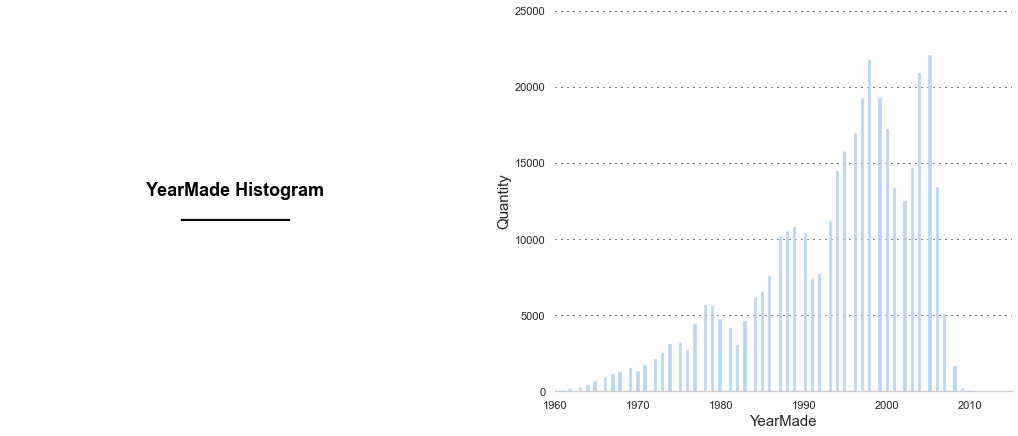

In [34]:
sns.set_theme(style="whitegrid", palette="pastel")

fig, (ax0, ax1) = plt.subplots(nrows=1,
                               ncols=2,
                               figsize=(18, 7))

ax0.text(0.5,0.5,"YearMade Histogram\n___________",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        fontweight='bold',
        color='#000000')

ax0.set_xticklabels([])
ax0.set_yticklabels([])
ax0.tick_params(left=False, bottom=False)
ax0.grid(False)

ax1.set(xlim=(1960, 2015))
ax1.set(ylim=(0, 25000))
ax1.grid(False)
ax1.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.histplot(df['YearMade'])
ax1.set_xlabel("YearMade", fontsize=15)
ax1.set_ylabel("Quantity", fontsize=15)

ax0.spines["top"].set_visible(False)
ax0.spines["left"].set_visible(False)
ax0.spines["bottom"].set_visible(False)
ax0.spines["right"].set_visible(False)
ax1.spines["top"].set_visible(False)
ax1.spines["left"].set_visible(False)
ax1.spines["right"].set_visible(False)

#### 6.5 SalePrice by YearMade <a id=20></a>

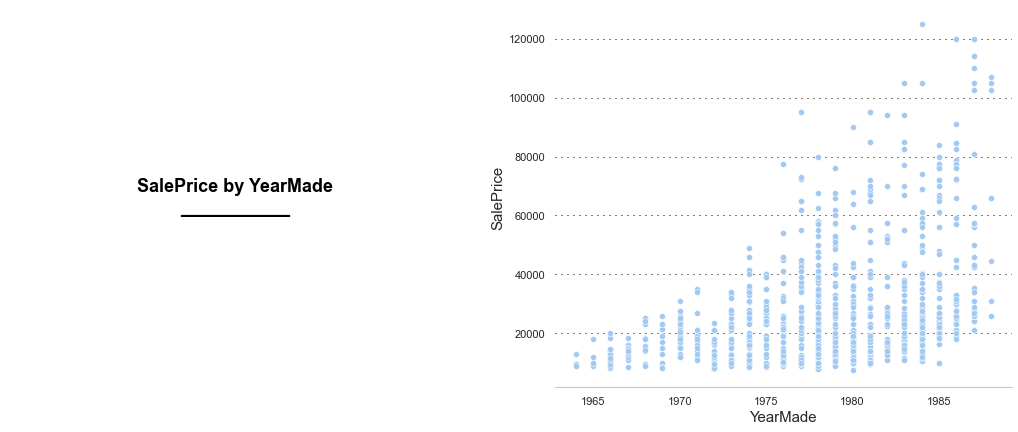

In [35]:
sns.set_theme(style="whitegrid", palette="pastel")

fig, (ax0, ax1) = plt.subplots(nrows=1,
                               ncols=2,
                               figsize=(18, 7))

ax0.text(0.5,0.5,"SalePrice by YearMade\n___________",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        fontweight='bold',
        color='#000000')

ax0.set_xticklabels([])
ax0.set_yticklabels([])
ax0.tick_params(left=False, bottom=False)
ax0.grid(False)

ax1.grid(False)
ax1.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.scatterplot(df["YearMade"][:1000], df["SalePrice"][:1000]);
ax1.set_xlabel("YearMade", fontsize=15)
ax1.set_ylabel("SalePrice", fontsize=15)

ax0.spines["top"].set_visible(False)
ax0.spines["left"].set_visible(False)
ax0.spines["bottom"].set_visible(False)
ax0.spines["right"].set_visible(False)
ax1.spines["top"].set_visible(False)
ax1.spines["left"].set_visible(False)
ax1.spines["right"].set_visible(False)

### 7. Data Preprocessing <a id=21></a>
[Back to top](#99)

#### 7.1 Conclusions from the EDA <a id=22></a>

#### 7.2 Packages  <a id=23></a>

In [36]:
# Regular EDA and plotting libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 

# We want our plots to appear in the notebook
%matplotlib inline 

## Models
from sklearn.metrics import mean_squared_log_error, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor

## Model evaluators
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

#### 7.3 Splitting data into train/valid sets  <a id=24></a>

According to the [Kaggle data page](https://www.kaggle.com/c/bluebook-for-bulldozers/data), the validation set and test set are split according to dates.

This makes sense since because we're working on a time series problem.

Knowing this, randomly splitting our data into train and test sets using something like `train_test_split()` wouldn't work.

Instead, we split our data into training, validation and test sets using the date each sample occured.

In our case:

* Training = all samples up until 2011.
* Valid = all samples form 01.01.20121 - 30.04.2012.
* Test = all samples from 01.05.2012. - 01.11.2012

##### 7.3.1 Split data into training and validation

In [37]:
df_train = df_copy[df_copy.saleYear != 2012]
df_val = df_copy[df_copy.saleYear == 2012]

print("The length of training set is :", len(df_train))
print("The length of validation set is :", len(df_val))

The length of training set is : 401125
The length of validation set is : 11573


##### 7.3.2 Split data into X and y

In [38]:
X_train, y_train = df_train.drop("SalePrice", axis=1), df_train.SalePrice
X_valid, y_valid = df_val.drop("SalePrice", axis=1), df_val.SalePrice

print("The shape of X_train is :", X_train.shape)
print("The shape of y_train is :", y_train.shape)
print("The shape of X_valid is :", X_valid.shape)
print("The shape of y_valid is :", y_valid.shape)

The shape of X_train is : (401125, 102)
The shape of y_train is : (401125,)
The shape of X_valid is : (11573, 102)
The shape of y_valid is : (11573,)


### 8. Modeling <a id=25></a>
[Back to top](#99)

#### 8.1 Building an evaluation function  <a id=26></a>

According to [Kaggle](https://www.kaggle.com/c/bluebook-for-bulldozers/overview/evaluation) the evaluation function they use is root mean squared log error (RMSLE).

**RMSLE** = generally you don't care as much if you're off by $10 as much as you'd care if you were off by 10%, you care more about ratios rather than differences. **MAE** (mean absolute error) is more about exact differences.

Since Scikit-Learn doesn't have a function built-in for RMSLE, I will create my own.

We can do this by taking the square root of Scikit-Learn's mean_squared_log_error (MSLE). MSLE is the same as taking the log of mean squared error (MSE).

I will also calculate the MAE and R^2 for fun.

##### 8.1.1 Create Evaluation Functions

In [39]:
def rmsle(y_test, y_preds):
    return np.sqrt(mean_squared_log_error(y_test, y_preds))

def show_scores(model):
    train_preds = model.predict(X_train)
    val_preds = model.predict(X_valid)
    scores = {"Training MAE": mean_absolute_error(y_train, train_preds),
              "Valid MAE": mean_absolute_error(y_valid, val_preds),
              "Training RMSLE": rmsle(y_train, train_preds),
              "Valid RMSLE": rmsle(y_valid, val_preds),
              "Training R^2": model.score(X_train, y_train),
              "Valid R^2": model.score(X_valid, y_valid)}
    return scores

#### 8.2 Testing our Model on a Subset  <a id=27></a>

Because I'm not using very powerful PC retraing an entire model would take far too long to continuing experimenting.

So I will take a sample of the training set and tune the hyperparameters on that before training a larger model.

In [40]:
print("The length of X_train is :", len(X_train))

The length of X_train is : 401125


##### 8.2.1 Change max samples in RandomForestRegressor

In [41]:
model = RandomForestRegressor(n_jobs=-1, max_samples=10000)

Setting `max_samples` to 10000 means every `n_estimator` (default 100) in our `RandomForestRegressor` will only see 10000 random samples from our DataFrame instead of the entire 400,000.

In other words, we'll be looking at 40x less samples which means we'll get faster computation speeds but we should expect our results to worsen (simple the model has less samples to learn patterns from).

In [42]:
%%time

model.fit(X_train, y_train)

Wall time: 15.7 s


RandomForestRegressor(max_samples=10000, n_jobs=-1)

##### 8.2.2 Lets check our model scores

In [43]:
show_scores(model)

{'Training MAE': 5561.724634216266,
 'Valid MAE': 7163.388914715285,
 'Training RMSLE': 0.2580149957378359,
 'Valid RMSLE': 0.2940583167292834,
 'Training R^2': 0.8605877824054341,
 'Valid R^2': 0.8334444685551302}

### 9. Hyperparameter tuning and cross-validation <a id=28></a>
[Back to top](#99)

#### 9.1 Tuning model with with RandomizedSearchCV  <a id=29></a>

In [44]:
%%time

from sklearn.model_selection import RandomizedSearchCV

rf_grid = {"n_estimators": np.arange(10, 100, 10),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2),
           "max_features": [0.5, 1, "sqrt", "auto"],
           "max_samples": [10000]}

rs_model = RandomizedSearchCV(RandomForestRegressor(),
                              param_distributions=rf_grid,
                              n_iter=20,
                              cv=5,
                              verbose=True)

rs_model.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed: 11.0min finished


Wall time: 11min 21s


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [0.5, 1, 'sqrt',
                                                         'auto'],
                                        'max_samples': [10000],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   verbose=True)

###### 9.1.1 Best params from the RandomizedSearch 

In [45]:
rs_model.best_params_

{'n_estimators': 70,
 'min_samples_split': 16,
 'min_samples_leaf': 3,
 'max_samples': 10000,
 'max_features': 0.5,
 'max_depth': None}

###### 9.1.2 Evaluate RandomSerach model 

In [46]:
show_scores(rs_model)

{'Training MAE': 6078.513939732082,
 'Valid MAE': 7376.5712280137495,
 'Training RMSLE': 0.2763391949392912,
 'Valid RMSLE': 0.3006411260027896,
 'Training R^2': 0.8360748089438663,
 'Valid R^2': 0.823013096237138}

##### 9.1.3 Train a model with the best parameters 

In a model I prepared earlier, I tried 100 different combinations of hyperparameters (setting `n_iter` to 100 in `RandomizedSearchCV`) and found the best results came from the ones you see below.

We'll instantiate a new model with these discovered hyperparameters and reset the `max_samples` back to its original value.

In [ ]:
%%time

ideal_model = RandomForestRegressor(n_estimators=70,
                                    min_samples_split=8,
                                    min_samples_leaf=3,
                                    max_features= 'auto',
                                    n_jobs=-1,
                                    max_samples=None)
ideal_model.fit(X_train, y_train)

##### 9.1.4 Evaluate our idel model 

In [ ]:
show_scores(ideal_model)

#### 9.2 Make predictions on test data  <a id=30></a>

Now we've got a trained model, it's time to make predictions on the test data.

Remember what we've done.

Our model is trained on data prior to 2011. However, the test data is from 01.05.2021. to 01.11.2012.

So what we're doing is trying to use the patterns our model has learned in the training data to predict the sale price of a Bulldozer with characteristics it's never seen before but are assumed to be similar to that of those in the training data.

##### 9.2.1 Load our Test data

In [ ]:
df_test = pd.read_csv("bulldozer/Test.csv",
                      parse_dates=["saledate"])
df_test.head()

##### 9.2.2 Preprocessing the test data
Our model has been trained on data formatted in the same way as the training data.

This means in order to make predictions on the test data, we need to take the same steps we used to preprocess the training data to preprocess the test data.

Remember: Whatever you do to the training data, you have to do to the test data.

###### 9.2.2.1 Function for preprocessing the data

In [ ]:
def preprocess_data(df):
    df["saleYear"] = df.saledate.dt.year
    df["saleMonth"] = df.saledate.dt.month
    df["saleDay"] = df.saledate.dt.day
    df["saleDayofweek"] = df.saledate.dt.dayofweek
    df["saleDayofyear"] = df.saledate.dt.dayofyear

    df.drop("saledate", axis=1, inplace=True)
    
    for label, content in df.items():
        if pd.api.types.is_numeric_dtype(content):
            if pd.isnull(content).sum():
                df[label+"_is_missing"] = pd.isnull(content)
                df[label] = content.fillna(content.median())
                
        if not pd.api.types.is_numeric_dtype(content):
            df[label+"_is_missing"] = pd.isnull(content)
            df[label] = pd.Categorical(content).codes+1        
    
    return df

###### 9.2.2.2 Preprocessing the test dataset

In [ ]:
df_test = preprocess_data(df_test)
df_test.head()

###### 9.2.2.3 Make predictions on the test dataset using the best model

In [ ]:
test_preds = ideal_model.predict(df_test)

We've found an error and it's because our test dataset (after preprocessing) has 101 columns where as, our training dataset (X_train) has 102 columns (after preprocessing).

###### 9.2.2.4 Find missing columns

In [ ]:
set(X_train.columns) - set(df_test.columns)

In this case, it's because the test dataset wasn't missing any auctioneerID fields.

To fix it, we'll add a column to the test dataset called `auctioneerID_is_missing` and fill it with False, since none of the auctioneerID fields are missing in the test dataset.

###### 9.2.2.5 Match test dataset columns to training dataset

In [ ]:
df_test["auctioneerID_is_missing"] = False
df_test.head()

###### 9.2.2.6 Make predictions on the test dataset using the best model

Now the test dataset matches the training dataset, we should be able to make predictions on it using our trained model.

In [ ]:
test_preds = ideal_model.predict(df_test)

##### 9.2.3 Create DataFrame compatible with Kaggle submission requirements

When looking at the [Kaggle](https://www.kaggle.com/c/bluebook-for-bulldozers/overview/evaluation) submission requirements, we see that if we wanted to make a submission, the data is required to be in a certain format. Namely, a DataFrame containing the `SalesID` and the predicted `SalePrice` of the bulldozer.

In [ ]:
df_preds = pd.DataFrame()
df_preds["SalesID"] = df_test["SalesID"]
df_preds["SalePrice"] = test_preds
df_preds

##### 9.2.4 Export predictions 

In [ ]:
df_preds.to_csv("bulldozer/predictions.csv",
                index=False)

### 11. Feature importance <a id=31></a>
[Back to top](#99)

Since I have built a model which is able to make predictions lets check what parts of the data led to these predictions.

In our case, after our model learned the patterns in the data, which bulldozer sale attributes were most important for predicting its overall sale price?

#### 11.1 Find Feature Importance of our best Model  <a id=32></a>

In [ ]:
ideal_model.feature_importances_

#### 11.2 Function for plotting Feature Importance  <a id=33></a>

In [ ]:
def plot_features(columns, importances, n=20):
    df = (pd.DataFrame({"features": columns,
                        "feature_importance": importances})
          .sort_values("feature_importance", ascending=False)
          .reset_index(drop=True))
    
    sns.barplot(x="feature_importance",
                y="features",
                data=df[:n],
                orient="h")

#### 11.3 Visualise Feature Importance  <a id=34></a>

In [ ]:
sns.set_theme(style="whitegrid", palette="pastel")

fig, (ax0, ax1) = plt.subplots(nrows=1,
                               ncols=2,
                               figsize=(18, 7))

# Title of the plot
ax0.text(0.5,0.5,"Feature importance\n___________",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        fontweight='bold',
        color='#000000')

ax0.set_xticklabels([])
ax0.set_yticklabels([])
ax0.tick_params(left=False, bottom=False)
ax0.grid(False)

# Target Count
ax1.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
plot_features(X_train.columns, ideal_model.feature_importances_)
ax1.set_xlabel("")
ax1.set_ylabel("")


ax0.spines["top"].set_visible(False)
ax0.spines["left"].set_visible(False)
ax0.spines["bottom"].set_visible(False)
ax0.spines["right"].set_visible(False)
ax1.spines["top"].set_visible(False)
ax1.spines["left"].set_visible(False)
ax1.spines["right"].set_visible(False)